In [133]:
# y = mx + b
# m = best fit slope
# b = y intercept

# m = ((x'.y') - (x.y)') / ((x')^2 - (x^2)')
# b = 

from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import random

xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)

In [134]:
def create_dataset(datasetsize, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(datasetsize):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(datasetsize)]

    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

def best_fit_slope_and_intercept(xs, ys): 
    m =  ( ((mean(xs) * mean(ys)) - mean(xs*ys)) /
    ((mean(xs) * mean(xs)) - mean(xs*xs)) )
    
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

def coefficient_of_determination(ys_orig, ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_reg = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    print("regression line error: {r}\nmean line error: {m}".format(r=squared_error_reg, m=squared_error_y_mean))
    return 1 - (squared_error_reg / squared_error_y_mean)

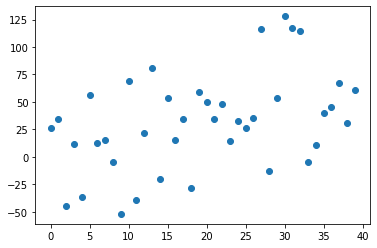

(1.6389305816135087, -0.18414634146342124)

In [135]:
xs, ys = create_dataset(40, 80, 2, correlation='pos')
plt.scatter(xs, ys)
plt.show()


m, b = best_fit_slope_and_intercept(xs, ys)
regression_line = np.array([m*x + b for x in xs])

m, b

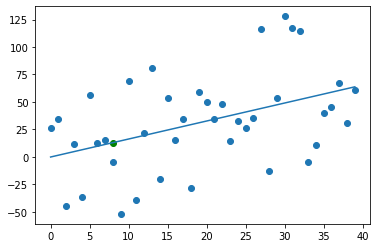

In [136]:
predict_x = 8
predict_y = (m*predict_x + b)
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.scatter(predict_x, predict_y, color='green')
plt.show()

In [137]:
r_squared = coefficient_of_determination(ys, regression_line)
r_squared

regression line error: 61142.09690431521
mean line error: 75458.975


0.18973061979287154